<a href="https://colab.research.google.com/github/kLahari28/softwareengenering/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

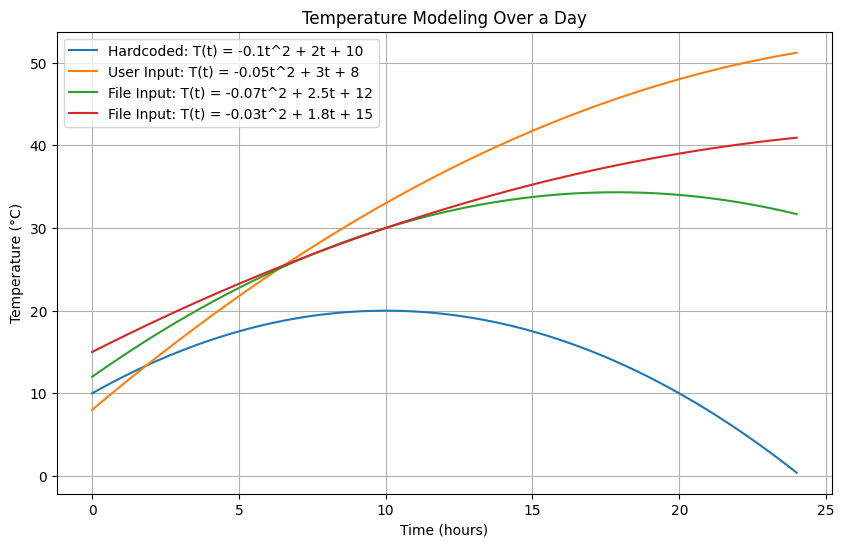

Results saved to: ./output_data/temperature_results.json
Plot saved to: ./output_data/temperature_model_plot.png


In [ ]:
#BU22CSEN0101986
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Function to compute quadratic values (modified for temperature modeling)
def temperature_model(a, b, c, t_range):
    t = np.linspace(t_range[0], t_range[1], 100)
    T = -a * t**2 + b * t + c
    return t, T

# Function to save data to a file
def save_to_file(data, filename):
    output_dir = './output_data/'  # Simplified directory path
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, filename)
    with open(file_path, 'w') as f:
        json.dump(data, f)
    return file_path

# Function to plot and save graph
def plot_graph(data, labels, title, filename):
    plt.figure(figsize=(10, 6))
    for t, T, label in data:
        plt.plot(t, T, label=label)
    plt.title(title)
    plt.xlabel("Time (hours)")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    output_dir = './output_data/'
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, filename)
    plt.savefig(plot_path)
    plt.show()
    return plot_path

# Stage 1: Hardcoded example
hardcoded_coeffs = (0.1, 2, 10)  # Example: T(t) = -0.1t^2 + 2t + 10
t_range = (0, 24)  # Time range for one day
t1, T1 = temperature_model(*hardcoded_coeffs, t_range)

# Stage 2: User input (simulated)
user_coeffs = (0.05, 3, 8)  # Example: T(t) = -0.05t^2 + 3t + 8
t2, T2 = temperature_model(*user_coeffs, t_range)

# Stage 3: Read from file (simulated list of inputs)
file_inputs = [
    {"a": 0.07, "b": 2.5, "c": 12},  # Example 1: T(t) = -0.07t^2 + 2.5t + 12
    {"a": 0.03, "b": 1.8, "c": 15},  # Example 2: T(t) = -0.03t^2 + 1.8t + 15
]

data_to_plot = [
    (t1, T1, f"Hardcoded: T(t) = -{hardcoded_coeffs[0]}t^2 + {hardcoded_coeffs[1]}t + {hardcoded_coeffs[2]}"),
    (t2, T2, f"User Input: T(t) = -{user_coeffs[0]}t^2 + {user_coeffs[1]}t + {user_coeffs[2]}"),
]

results = []
for coeffs in file_inputs:
    t, T = temperature_model(coeffs["a"], coeffs["b"], coeffs["c"], t_range)
    results.append({"t": t.tolist(), "T": T.tolist()})
    data_to_plot.append((t, T, f"File Input: T(t) = -{coeffs['a']}t^2 + {coeffs['b']}t + {coeffs['c']}"))

# Save results
results_file = save_to_file(results, "temperature_results.json")

# Plot all results
plot_file = plot_graph(data_to_plot, None, "Temperature Modeling Over a Day", "temperature_model_plot.png")

print(f"Results saved to: {results_file}")
print(f"Plot saved to: {plot_file}")